<h1>Table of Content<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Study-of-General-Information" data-toc-modified-id="Study-of-General-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Study of General Information</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Building-Up-a-User-Profile-for-Each-Region" data-toc-modified-id="Building-Up-a-User-Profile-for-Each-Region-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Building Up a User Profile for Each Region</a></span><ul class="toc-item"><li><span><a href="#North-America" data-toc-modified-id="North-America-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>North America</a></span></li><li><span><a href="#Europe" data-toc-modified-id="Europe-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Europe</a></span></li><li><span><a href="#Japan" data-toc-modified-id="Japan-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Japan</a></span></li></ul></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypothesis Testing</a></span><ul class="toc-item"><li><span><a href="#Hypothesis-№1" data-toc-modified-id="Hypothesis-№1-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Hypothesis №1</a></span></li><li><span><a href="#Hypothesis-№2" data-toc-modified-id="Hypothesis-№2-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Hypothesis №2</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusions</a></span><ul class="toc-item"><li><span><a href="#Progress-of-the-Research" data-toc-modified-id="Progress-of-the-Research-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Progress of the Research</a></span></li><li><span><a href="#General-Overview-of-the-Industry" data-toc-modified-id="General-Overview-of-the-Industry-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>General Overview of the Industry</a></span></li><li><span><a href="#User-Profile-by-Region" data-toc-modified-id="User-Profile-by-Region-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>User Profile by Region</a></span><ul class="toc-item"><li><span><a href="#North-America" data-toc-modified-id="North-America-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>North America</a></span></li><li><span><a href="#Europe" data-toc-modified-id="Europe-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Europe</a></span></li><li><span><a href="#Japan" data-toc-modified-id="Japan-6.3.3"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Japan</a></span></li></ul></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Hypothesis Testing</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Recommendations</a></span></li></ul></li></ul></div>

# Research of Video Games Market

**The purpose of the research** is to identify patterns that determine success of a game. This will allow to focus on a potentially popular product and to plan advertising campaigns.

**Progress of the research** will have 6 steps:
1. Study of general information
2. Data preprocessing
3. Exploratory data analysis
4. Building up a portrait of the user of each region
5. Hypothesis testing
- The average user scores of Xbox One and PC platforms are the same
- The average user scores of Action and Sports genres are the same
6. Conclusions and results

## Study of General Information

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import missingno as msno

df = pd.read_csv('games.csv')

In [155]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


For research, we have a table consisting of 11 columns and 16715 rows with quantitative and categorical variables.

## Data Preprocessing

In [157]:
# Adjust the column names (to lower case).

df.columns = df.columns.str.lower()

In [158]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [159]:
# Check the data for duplicates.

df.duplicated().sum()

0

In [160]:
# Check what values user_score has.

df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [161]:
# Change the data type in user_score since this score is a number from 0 to 10,
# and the value 'tbd' will be converted to NaN.

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [162]:
# Check the changes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [163]:
# Check the data for missing values.

df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

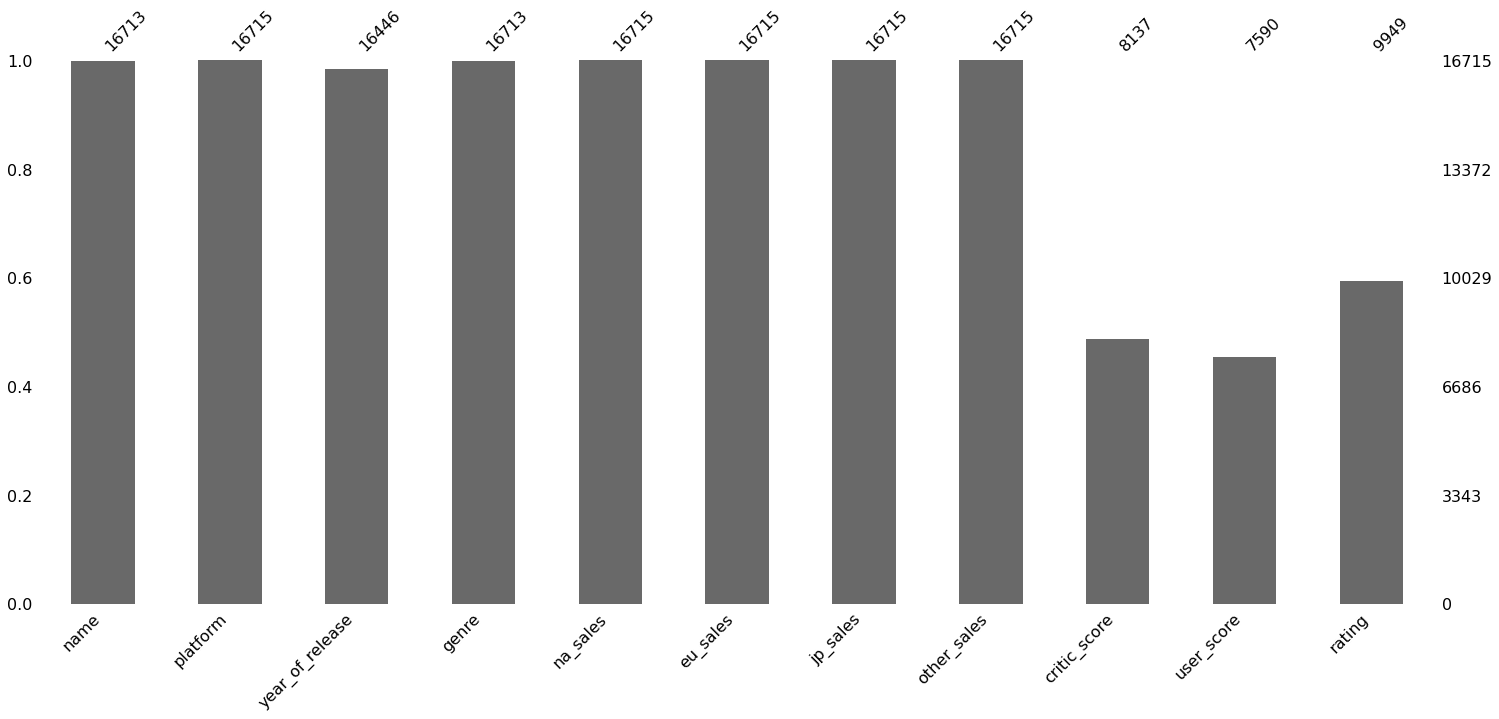

In [164]:
msno.bar(df);

The dataset is compiled from many open sources, so gaps appear in it. The year may be not defined, as games sometimes have different release dates in different countries, and are also released in an "early access" status. Ratings and scores may be missing for very old games, as well as for the newest games for which they have not yet been formed.

In [165]:
# Check the missing values in the name column.

df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [166]:
# Delete these 2 uninformative lines.

df = df[~df['name'].isna()]

The rest of the missing values will be left as is, as they will not affect our research. 

We handled the user score 'tbd' in the last step and turned it into NaN, since the value in fact is missing.

In [203]:
# For further research, we will calculate the total sales in the total_sales column.

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [168]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Exploratory Data Analysis

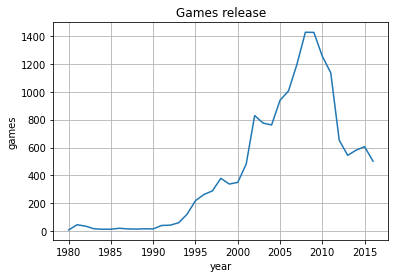

In [169]:
# Let's see how games were released over the years.

df.groupby('year_of_release')['name'].count().plot(grid=True, 
                                                   title='Games release')
plt.xlabel('year')
plt.ylabel('games');

We can see that in the 80s, games just started to appear, in the 90s, we see growth from dozens of games to almost four hundred by 2000. In the 2000s, we see a strong growth to 1400 games per year until 2008, when the financial crisis happened. Since then, there has been a decline.

In [170]:
# Let's look at the total sales by platform.

df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

In [171]:
# TOP 5 platforms by total sales.

df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

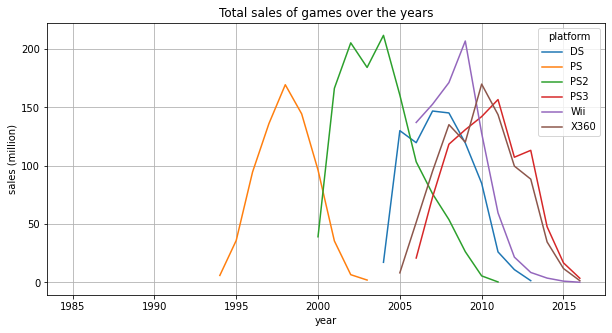

In [172]:
# Let's look at the total sales of TOP-5 platforms by years.

df.query("platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']").pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(title='Total sales of games over the years', 
                        grid=True, 
                        figsize=(10,5))
plt.legend(title='platform')
plt.xlabel('year')
plt.ylabel('sales (million)');

It is clear that the life span of any platform does not exceed 10 years, and the emergence is usually very fast – with a rapid growth during the first 2 years. By 2015, sales of the TOP-5 most popular platforms are reduced to almost 0 (as they were replaced by new generations of platforms).

Let's look at the data for the last 5 years. We don't have complete data for 2016, so let's look at data from 2011 to 2015 inclusive.

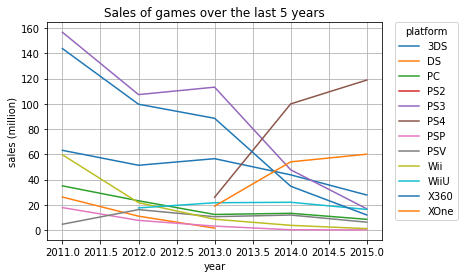

In [173]:
# Let's look at the sales from 2011 to 2015.

df.query('2010 < year_of_release  < 2016').pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum').plot(title='Sales of games over the last 5 years',
                       grid=True)
plt.xlabel('year')
plt.ylabel('sales (million)')
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0, title='platform');

We see that over the past 5 years, sales of the most popular consoles have been declining, they are being replaced by others:
- PS3 is replaced by PS4 (leader in 2015 - about 120 million sales),
- X360 is replaced by XOne (60 million sales in 2015).

PS4 and XOne are our potentially profitable platforms, we will work with them. Note that both platforms were released at the end of 2013.

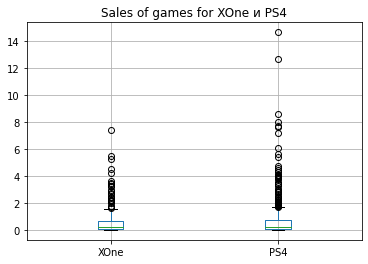

In [174]:
# Build a boxplot for sales of games for XOne and PS4 platforms.

data = pd.DataFrame({"XOne": df.query('platform == "XOne"')['total_sales'], 
                     "PS4": df.query('platform == "PS4"')['total_sales']})
ax = data[['XOne', 'PS4']].plot(kind='box', 
                                title='Sales of games for XOne и PS4', 
                                grid=True)

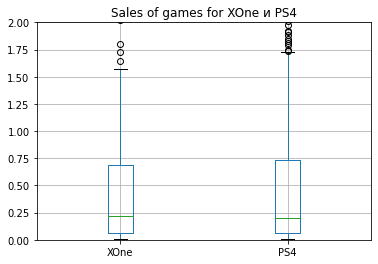

In [175]:
# Scale the boxplots.

data = pd.DataFrame({"XOne": df.query('platform == "XOne"')['total_sales'], 
                     "PS4": df.query('platform == "PS4"')['total_sales']})
ax = data[['XOne', 'PS4']].plot(kind='box', 
                                title='Sales of games for XOne и PS4', 
                                grid=True)
plt.ylim(0, 2);

In [176]:
# Let's look at the numerical description of the data for games for PS4.

df.query('platform == "PS4"')['total_sales'].describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [177]:
# Let's look at the numerical description of the data for games for XOne.

df.query('platform == "XOne"')['total_sales'].describe()

count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

Boxplots for PS4 and XOne consoles are very similar: the median is about 0.20 - 0.22 (200 - 220 thousand copies of games). PS4 is slightly more successful (PS4's average of 0.80 vs XOne's average of 0.65) due to several highly successful games.

In [178]:
# Evaluate the correlation between total sales and user score.

df.query('platform == "PS4"')['total_sales'].corr(
    df.query('platform == "PS4"')['user_score'])

-0.03195711020455643

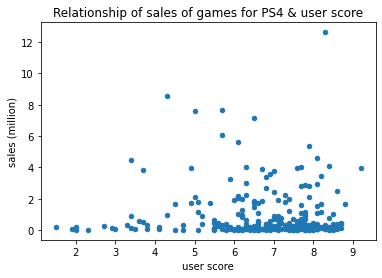

In [180]:
# Create a scatterplot between user score and total sales.

df.query('platform == "PS4"').plot(x='user_score', 
                                   y='total_sales', 
                                   kind='scatter')
plt.title('Relationship of sales of games for PS4 & user score')
plt.xlabel('user score')
plt.ylabel('sales (million)');

There is almost zero correlation between sales and user score. There is no linear connection.

In [179]:
# Evaluate the correlation between total sales and critic score.

df.query('platform == "PS4"')['total_sales'].corr(
    df.query('platform == "PS4"')['critic_score'])

0.4065679020617816

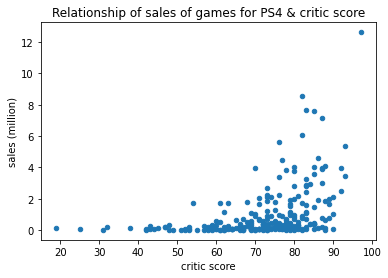

In [181]:
# Create a scatterplot between critic score and total sales.

df.query('platform == "PS4"').plot(x='critic_score', 
                                   y='total_sales', 
                                   kind='scatter')
plt.title('Relationship of sales of games for PS4 & critic score')
plt.xlabel('critic score')
plt.ylabel('sales (million)');

There is a moderate positive correlation between sales and critic score.

User scores do not affect sales in any way, while critic scores have a positive effect on sales to some extent. In the gaming industry, users listen to critics (thematic sites, magazines, stores).

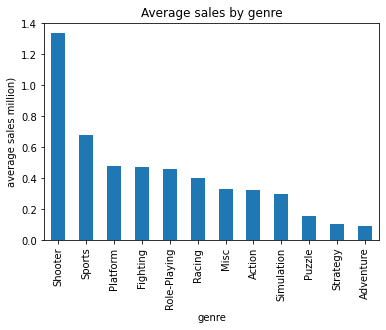

In [182]:
# Let's look at the distribution of sales by genre.
# We will consider that PS4 and XOne came out at the end of 2013.

(df.query('year_of_release > 2013')
 .groupby('genre')['total_sales'].mean()
 .sort_values(ascending=False)
 .plot(kind='bar'))
plt.title('Average sales by genre')
plt.ylabel('average sales million)')
plt.xlabel('genre');

The most profitable genre is Shooter (average sales – 1.34 million games), it is 2 times ahead of its closest "competitor" – Sports (which has average sales of 680 thousand games).

They are followed by a cluster of genres with average sales of 400-500 thousand games:
- Platform,
- Fighting,
- Role-Playing,
- Racing.

The Miscellaneous, Action and Simulation genres bring less profit. And the least profitable genres are Puzzle, Strategy and Adventure.

## Building Up a User Profile for Each Region

For the user of each region (North America, Europe, Japan), let's define:
- Most popular platforms (top 5).
- The most popular genres (top 5).
- Impact of ESRB rating on sales.

Keep in mind that PS4 and XOne came out at the end of 2013, so we will analyze the data starting from 2014.

### North America

In [183]:
# Let's look at the TOP-5 platforms in North America.

na_sales = (df.query('year_of_release > 2013')
            .groupby('platform')['na_sales'].sum()
            .sort_values(ascending=False))
na_sales = pd.DataFrame(na_sales)
na_sales['share'] = na_sales['na_sales'] / na_sales['na_sales'].sum()
na_sales.head()

,na_sales,share
platform,,
PS4,98.61,0.347145
XOne,81.27,0.286102
X360,28.30,0.099627
3DS,22.64,0.079701
PS3,22.05,0.077624


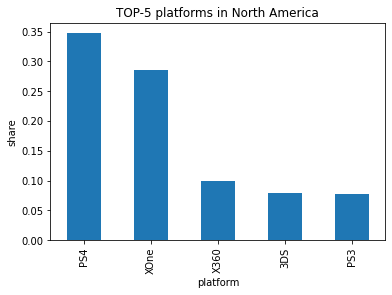

In [184]:
# Build a bar chart.

na_sales['share'].head().plot(kind='bar')
plt.title('TOP-5 platforms in North America')
plt.xlabel('platform')
plt.ylabel('share');

The most popular platform in North America is PS4 (35%) followed by XOne (29%). Together, game sales on these platforms account for about 64% of the market in North America over the past 3 years.

In [185]:
# Let's look at the TOP-5 genres in North America.

(df.query('year_of_release > 2013')
 .groupby('genre')['na_sales'].sum()
 .sort_values(ascending=False).head())

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

The most popular genre is Shooter. In the US, video games where players can shoot are very successful. Also a very popular genre is Action.

Next come:
- Sports,
- Role-Playing,
- Misc (miscellaneous).

In [186]:
# Let's see how rating affects sales.

(df.query('year_of_release > 2013')
 .groupby('rating')['na_sales'].sum()
 .sort_values(ascending=False))

rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

The majority of sales are M-rated games (Mature): games for people over 17 years old. It includes shooters and some action games in which there is blood, violence, obscene language. Sales of M-rated games exceed sales of E10+ games by almost 3 times.

It is followed by E (Everyone): games for any audience, this rating is given to sports games (for example, FIFA).

Next comes (T) Teen: 13 and up: action and some shooters. 

And the least popular rating is E10+ (Everyone 10+): from 10 years. 

### Europe

In [187]:
# Let's look at the TOP-5 platforms in Europe.

eu_sales = (df.query('year_of_release > 2013')
            .groupby('platform')['eu_sales'].sum()
            .sort_values(ascending=False))
eu_sales = pd.DataFrame(eu_sales)
eu_sales['share'] = eu_sales['eu_sales'] / eu_sales['eu_sales'].sum()
eu_sales.head()

,eu_sales,share
platform,,
PS4,130.04,0.480420
XOne,46.25,0.170866
PS3,25.54,0.094355
PC,17.97,0.066388
3DS,16.12,0.059554


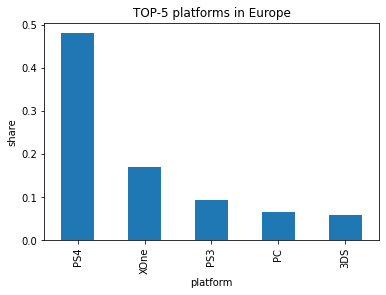

In [188]:
# Build a bar chart.

eu_sales['share'].head().plot(kind='bar')
plt.title('TOP-5 platforms in Europe')
plt.xlabel('platform')
plt.ylabel('share');

The most popular platform is PS4, which has a market share of 48%, which is almost 3 times more than its closest competitor XOne (17%).

In [189]:
# Let's look at the TOP-5 genres in Europe.

(df.query('year_of_release > 2013')
 .groupby('genre')['eu_sales'].sum()
 .sort_values(ascending=False).head())

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

In Europe, Action and Shooter genres are swapped, followed by Sports genre.

Role-Playing and Racing genres take the 4th and 5th places.

In [190]:
# Let's see how rating affects sales.

(df.query('year_of_release > 2013')
 .groupby('rating')['eu_sales'].sum()
 .sort_values(ascending=False))

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

As in the North American market, in Europe, the M rating is the leader, followed by E, T, E10+.

### Japan

In [191]:
# Let's look at the TOP-5 platforms in Japan.

jp_sales = (df.query('year_of_release > 2013')
            .groupby('platform')['jp_sales'].sum()
            .sort_values(ascending=False))
jp_sales = pd.DataFrame(jp_sales)
jp_sales['share'] = jp_sales['jp_sales'] / jp_sales['jp_sales'].sum()
jp_sales.head()

,jp_sales,share
platform,,
3DS,44.24,0.475239
PS4,15.02,0.161349
PSV,14.54,0.156193
PS3,11.22,0.120529
WiiU,7.31,0.078526


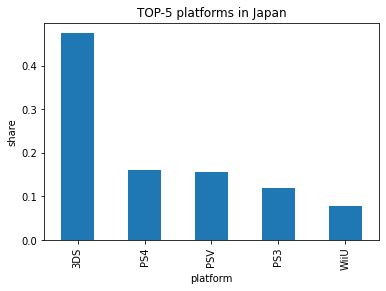

In [192]:
jp_sales['share'].head().plot(kind='bar')
plt.title('TOP-5 platforms in Japan')
plt.xlabel('platform')
plt.ylabel('share');

The most popular platform in Japan is 3DS from the Japanese company Nintendo. Following are also Japanese consoles PS4, PSV, PS3, WiiU. The American platform XOne has practically no sales in the Japanese market.

In [193]:
# Let's look at the TOP-5 genres in Japan.

(df.query('year_of_release > 2013')
 .groupby('genre')['jp_sales'].sum()
 .sort_values(ascending=False).head())

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

The 2 most popular genres are Role-Playing and Action. Shooters are no longer as popular as in North America and Europe.

In [194]:
# Let's see how rating affects sales.

(df.query('year_of_release > 2013')
 .groupby('rating')['jp_sales'].sum()
 .sort_values(ascending=False))

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

The most popular rating is T, followed by E. In Japanese culture, games that contain less violence and gore are more popular than in the US.

## Hypothesis Testing

Let's test the following hypotheses:
1. The average user scores of Xbox One and PC are the same;
2. The average user scores of Action and Sports genres are the same.

### Hypothesis №1

Let's start with the first hypothesis. We introduce the null and alternative hypotheses:

- **H0**: The average user score of Xbox One and PC are the same,
- **H1**: The average user score of Xbox One and PC are different.

Significance level: α=0.05

To test hypotheses, we will use Student's t-test.

For this, 3 conditions must be met:

1. Compared values do not constitute a pair of correlated values.
2. The distribution of features in each sample corresponds to a normal distribution.
3. The variances of the feature in the samples are approximately equal.

The first condition is met, since there is no evidence to suggest that these samples are dependent. Let's check the second condition.

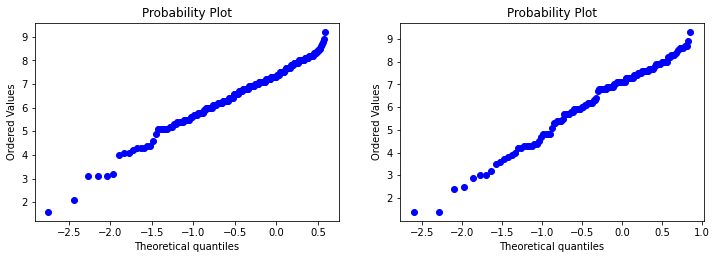

In [195]:
# xone_user_score - sample for Xbox One,
# pc_user_score - sample PC.

xone_user_score = df.query('year_of_release > 2013 & platform == "XOne"')['user_score']
pc_user_score = df.query('year_of_release > 2013 & platform == "PC"')['user_score']

# Build probability plots for these samples.

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(xone_user_score, dist='norm', plot=plt)
plt.subplot(2,2,2)
st.probplot(pc_user_score, dist='norm', plot=plt);

The second condition about the normal distribution is met. Let's check the third condition about the equality of variances.

In [196]:
# Calculate the variances.

display(np.var(xone_user_score))
display(np.var(pc_user_score))

1.879546005509642

2.8773743617307175

The variances are not equal, we will take this into account when testing hypotheses.

If the p-value is less than the chosen significance level α=0.05, then we will reject the null hypothesis about the equality of the means. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.

In [197]:
# Run a t-test.

alpha = 0.05

results = st.ttest_ind(xone_user_score.dropna(), pc_user_score.dropna(), equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 0.11601398086668835
Failed to reject the null hypothesis


We failed to reject the null hypothesis. The average user scores of Xbox One and PC platforms are the same.

In [198]:
# Let's look at measures of central tendency.

display(xone_user_score.mean())
display(pc_user_score.mean())

display(xone_user_score.median())
display(pc_user_score.median())

6.594545454545454

6.298360655737704

6.8

6.8

The average user scores of the Xbox One and PC platforms are very similar (6.6 and 6.3) and the medians are the same (6.8).

### Hypothesis №2

Let's test the second hypothesis. We introduce the null and alternative hypotheses:

- **H0**: Average user scores of Action and Sports genres are the same,
- **H1**: Average user scores of Action and Sports genres are different.

Significance level: α=0.05

We also check the samples for normal distribution.

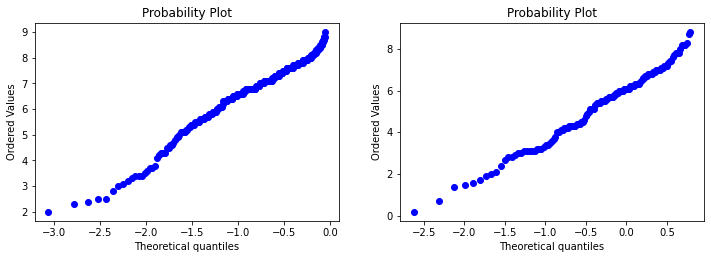

In [199]:
# action_user_score - sample for Action,
# sports_user_score - sample for Sports.

action_user_score = df.query('year_of_release > 2013 & genre == "Action"')['user_score']
sports_user_score = df.query('year_of_release > 2013 & genre == "Sports"')['user_score']

# Build probability plots for these samples.

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
st.probplot(action_user_score, dist='norm', plot=plt)
plt.subplot(2,2,2)
st.probplot(sports_user_score, dist='norm', plot=plt);

The second condition about the normal distribution is met. Let's check the variances.

In [200]:
# Calculate the variances.

display(np.var(action_user_score))
display(np.var(sports_user_score))

1.89208448117539

3.419837559675119

The variances are not equal, we will consider it when testing hypotheses.

In [201]:
# Run a t-test.

results = st.ttest_ind(action_user_score.dropna(), sports_user_score.dropna(), equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p-value: 1.1825550382644557e-14
Reject the null hypothesis


The p-value turned out to be very small. There are reasons to reject the null hypothesis in favor of the alternative.

In [202]:
# Let's look at measures of central tendency.

display(action_user_score.mean())
display(sports_user_score.mean())
display(action_user_score.median())
display(sports_user_score.median())

6.760606060606061

5.225196850393701

7.1

5.5

The average user scores of Action and Sports genres are indeed different.

## Conclusions

### Progress of the Research

At the beginning of the research, we set a goal – to identify the patterns that determine the success of a game and did this in several steps:

1. We studied the general information in the dataset.
2. We conducted data preprocessing:
- checked the data for duplicates,
- processed the columns and brought them to the required data types,
- checked missing values.
3. We conducted exploratory data analysis.
4. We built up a portrait of a user in each region.
5. We tested 2 hypotheses:
- The average user scores of Xbox One and PC platforms are the same;
- The average user scores of the Action and Sports genres are the same.


### General Overview of the Industry

In the 80s, games were just starting to appear; in the 90s, the industry began to grow to 400 games a year by 2000. In the 2000s, there was a strong growth to 1400 games per year until 2008, when the financial crisis happened. Since then, the industry has seen a decline.

For all the years, the most popular platforms were PS2, X360, PS3, Wii, DS, but they are already outdated, and new generations of platforms have replaced them.

PS3 was replaced by PS4, X360 was replaced by XOne. PS4 and XOne are our potentially profitable platforms, they came out at the end of 2013.

User scores do not affect sales in any way, while critic scores have a positive effect on sales to some extent. In the gaming industry, users listen to critics (thematic sites, magazines, stores).

The most profitable genre is Shooter. And the least profitable genres are Puzzle, Strategy and Adventure.

### User Profile by Region

#### North America

Let's take the actual data for the last three years. In the North American market, the most popular platform is PS4 (35% market share), followed by XOne (29%). In total, game sales on these platforms account for about 64% of the market.


The most popular genre is Shooter. In the US, video games where players can shoot are very successful. Also a very popular genre is Action.

Next come:
- Sports,
- Role-Playing,
- Misc (miscellaneous).

The majority of sales are M-rated games (Mature): games for people over 17 years old. It includes shooters and some action games in which there is blood, violence, obscene language. Sales of M-rated games exceed sales of E10+ games by almost 3 times.

It is followed by E (Everyone): games for any audience, this rating is given to sports games (for example, FIFA).

Next comes (T) Teen: 13 and up: action and some shooters. 

And the least popular rating is E10+ (Everyone 10+): from 10 years. 

#### Europe

The most popular platform is PS4, which has a market share of 48%, which is almost 3 times more than its closest competitor XOne (17%). In Europe, Action and Shooter genres are swapped, followed by Sports genre. Slightly less popular genres are Role-Playing and Racing.

As in the North American market, in Europe, the M rating leads, followed by E, T, E10+.

#### Japan

The most popular platform in Japan is 3DS from the Japanese company Nintendo. Following are also Japanese consoles PS4, PSV, PS3, WiiU. The American platform XOne has practically no sales in the Japanese market.

The 2 most popular genres are Role-Playing and Action. Shooters are no longer as popular as in North America and Europe.

The most popular rating is T, followed by E. In Japanese culture, games that contain less violence and gore are more popular than in the US.

### Hypothesis Testing

We tested the following hypotheses:
1. The average user scores of Xbox One and PC platforms are the same,
2. The average user scores of Action and Sports genres are the same.

We failed to reject the first hypothesis. The average user scores of Xbox One and PC platforms are the same.

We reject the second hypothesis in favor of the alternative one, i.e. the average user scores for Action and Sports genres are different.

### Recommendations

In North America, you should bet on games for PS4 and XOne platforms and focus on Shooter, Action, Sports and Role-Playing genres (in descending order of priority).

In Europe, it's worth investing more in PS4, less in XOne. Priority genres (in descending order): Action, Shooter, Sports and Role-Playing.

In Japan, the 3DS is the most popular platform, but PS4 should also be considered. Games on XOne should not be promoted – the platform is not popular there. It is worth focusing on the 2 most popular genres: Role-Playing and Action.